In [3]:
import pandas as pd
from matplotlib import pyplot
%matplotlib inline
import numpy as np

load = pd.read_csv('pse_load.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
solar = pd.read_csv('solar.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
wind = pd.read_csv('wind.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
wind_offshore = pd.read_csv('wind_offshore.csv', header=3, index_col=0, parse_dates=True, squeeze=True)
wind_offshore = wind_offshore.set_index('local_time')

In [4]:
load2016 = load[8754:17508]
max_load=max(load2016)
load_scaled = load2016/max_load

In [5]:
load_df = pd.DataFrame(data=load_scaled)
load_df = load_df.merge(pd.DataFrame(data=solar), left_index=True, right_index=True)
load_df = load_df.merge(pd.DataFrame(data=wind), left_index=True, right_index=True)
load_df = load_df.merge(pd.DataFrame(data=wind_offshore), left_index=True, right_index=True)
load_df.columns = ['load', 'solar', 'wind', 'offshore']
load_df['sum_res']=load_df.solar + load_df.wind + load_df.offshore
load_df['is_res_over']=load_df.sum_res>load_df.load
load_df['is_res_over50']=load_df.sum_res>0.5*load_df.load
load_df['res_over'] = np.where(load_df['is_res_over']==True, load_df['sum_res'], np.NaN)
load_df['res_under'] = np.where(load_df['is_res_over']==False, load_df['sum_res'], np.NaN)
load_df['res_under50'] = np.where(load_df['is_res_over50']==False, load_df['sum_res'], np.NaN)

load_df

,load,solar,wind,offshore,sum_res,is_res_over,is_res_over50,res_over,res_under,res_under50
2016-01-01 01:00:00,0.592072,0.0,0.1530,0.409,0.5620,False,True,NaN,0.5620,NaN
2016-01-01 02:00:00,0.569301,0.0,0.1399,0.417,0.5569,False,True,NaN,0.5569,NaN
2016-01-01 03:00:00,0.543940,0.0,0.1308,0.417,0.5478,True,True,0.5478,NaN,NaN
2016-01-01 04:00:00,0.525647,0.0,0.1223,0.423,0.5453,True,True,0.5453,NaN,NaN
2016-01-01 05:00:00,0.517302,0.0,0.1138,0.432,0.5458,True,True,0.5458,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,0.764664,0.0,0.4185,0.941,1.3595,True,True,1.3595,NaN,NaN
2016-12-31 20:00:00,0.731335,0.0,0.4145,0.941,1.3555,True,True,1.3555,NaN,NaN
2016-12-31 21:00:00,0.686643,0.0,0.4135,0.941,1.3545,True,True,1.3545,NaN,NaN
2016-12-31 22:00:00,0.653165,0.0,0.4126,0.940,1.3526,True,True,1.3526,NaN,NaN


In [6]:
print(load_df.is_res_over.value_counts())
print(load_df.is_res_over50.value_counts())
print(load_df.sum_res.mean())

False    4480
True     4273
Name: is_res_over, dtype: int64
True     6934
False    1819
Name: is_res_over50, dtype: int64
0.765150085684908


In [8]:

import plotly.express as px
import plotly.graph_objects as go

fig = px.histogram(load_df, x="sum_res", color="is_res_over50",                    
                   labels={'sum_res':'Sum of RES capacity factors', 'is_res_over50':'Does RES generation cover 50% of the load?'}
                  )

fig.update_layout(
        width=1100,
        colorway=px.colors.qualitative.Prism,
        plot_bgcolor='white',  
        title=dict(
            text='<b>The times when no renewable source generates electricity are extremely rare (33 hours per year).</b>',
            font=dict(
                family="Work Sans, sans-serif",
                size=13,
                color="black",
            ),
            x=0,
            xref='paper',
            yref='paper',
            xanchor="left", 
            yanchor="top",
        ),
        margin=dict(t=80, b=80,l=50, r=50),
        font=dict(
            family="Work Sans, sans-serif",
            size=11,
            color="grey"
        ),
        annotations=[
            go.layout.Annotation( 
                text='<i>The distribution is clustered around the mean 0.76 with a long tail towards the right, showing very high potential for energy storage.</i>',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=0,
                y=1.1,
                xanchor="left", 
                yanchor="top",
                visible=True,
                font=dict(
                    family="Work Sans, sans-serif",
                    size=11,
                    color="grey"
                )
            ),
            go.layout.Annotation( 
                text='<i>Sources: Paweł Czyżak, CC BY-SA 4.0. Data from energy.instrat.pl and renewables.ninja. Chart shows distribution of summed capacity factors for RES.<br>Solar and onshore wind are national aggregates, offshore data for one of the confirmed locations with Vestas V164 turbine.</i>',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=0,
                y=-0.15,
                xanchor="left", 
                yanchor="top",
                visible=True,
                font=dict(
                    family="Work Sans, sans-serif",
                    size=11,
                    color="grey"
                )
            ),
        ]
)

fig.update_yaxes(title='')
fig.update_xaxes(title='')

fig.show(    
    config={
        'modeBarButtonsToRemove': ['lasso2d', "zoomIn2d", 'resetScale2d'],
        "locale": "en",
        "toImageButtonOptions": {"width": None, "height": None}
    },
)

In [261]:
fig.write_html("histogram.html", include_plotlyjs="cdn")

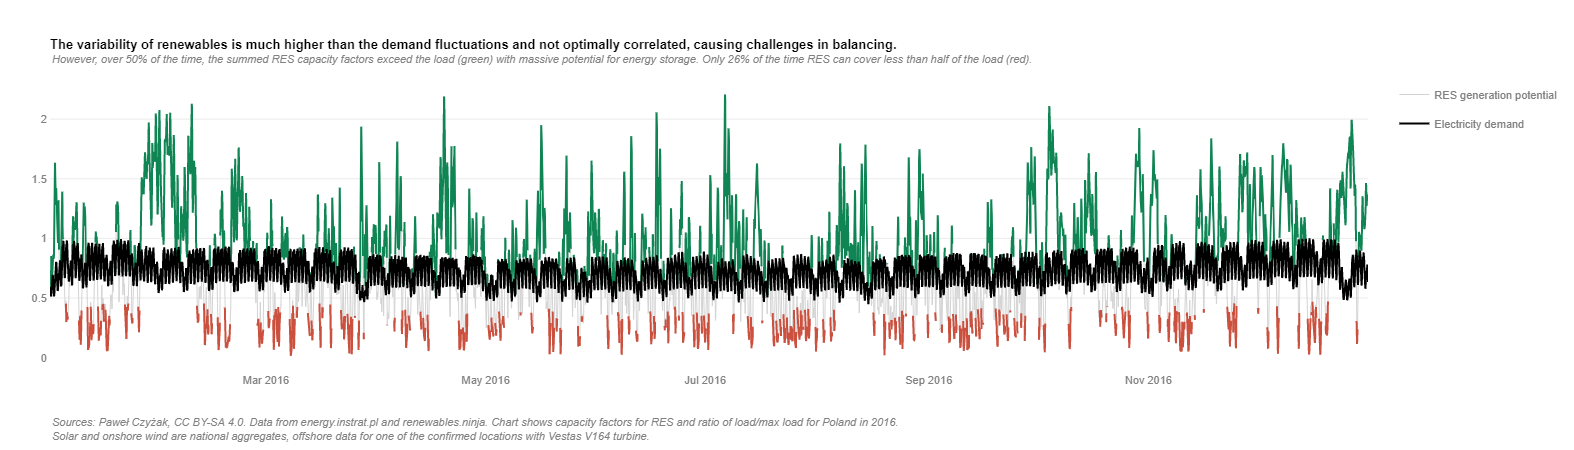

In [246]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(
)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='rgb(235, 235, 235)')

fig.add_trace(go.Scatter(x=load_df.index, y=load_df['sum_res'],
                    mode='lines',
                    name='RES generation potential',
                    line=dict(color='lightgrey', width=1),
                    legendgroup='group1',
                    ))
fig.add_trace(go.Scatter(x=load_df.index, y=load_df['res_under50'],
                    mode='lines',
                    name='RES generation potential',
                    line=dict(color='rgb(204, 80, 62)', width=2),
                    legendgroup='group1', showlegend = False
                    ))
fig.add_trace(go.Scatter(x=load_df.index, y=load_df['res_over'],
                    mode='lines',
                    name='RES generation potential',
                    line=dict(color='rgb(15, 133, 84)', width=2),
                    legendgroup='group1', showlegend = False,
                    ))
fig.add_trace(go.Scatter(x=load_df.index, y=load_df['load'],
                    mode='lines',
                    name='Electricity demand',
                    line=dict(color='black', width=2),
                    ))

fig.update_layout(
        width=1100,
        colorway=px.colors.qualitative.Prism,
        plot_bgcolor='white',  
        title=dict(
            text='<b>The variability of renewables is much higher than the demand fluctuations and not optimally correlated, causing challenges in balancing.</b>',
            font=dict(
                family="Work Sans, sans-serif",
                size=13,
                color="black",
            ),
            x=0,
            xref='paper',
            yref='paper',
            xanchor="left", 
            yanchor="top",
        ),
        margin=dict(t=80, b=80,l=50, r=50),
        font=dict(
            family="Work Sans, sans-serif",
            size=11,
            color="grey"
        ),
        annotations=[
            go.layout.Annotation( 
                text='<i>However, over 50% of the time, the summed RES capacity factors exceed the load (green) with massive potential for energy storage. Only 26% of the time RES can cover less than half of the load (red).</i>',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=0,
                y=1.1,
                xanchor="left", 
                yanchor="top",
                visible=True,
                font=dict(
                    family="Work Sans, sans-serif",
                    size=11,
                    color="grey"
                )
            ),
            go.layout.Annotation( 
                text='<i>Sources: Paweł Czyżak, CC BY-SA 4.0. Data from energy.instrat.pl and renewables.ninja. Chart shows capacity factors for RES and ratio of load/max load for Poland in 2016.<br>Solar and onshore wind are national aggregates, offshore data for one of the confirmed locations with Vestas V164 turbine.</i>',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=0,
                y=-0.15,
                xanchor="left", 
                yanchor="top",
                visible=True,
                font=dict(
                    family="Work Sans, sans-serif",
                    size=11,
                    color="grey"
                )
            ),
        ]
)
fig.show(    
    config={
        'modeBarButtonsToRemove': ['lasso2d', "zoomIn2d", 'resetScale2d'],
        "locale": "en",
        "toImageButtonOptions": {"width": None, "height": None}
    },
)


In [247]:
fig.write_html("all_year_graph.html", include_plotlyjs="cdn")

In [192]:
load_df_winter = load_df[0:168]
load_df_summer = load_df[4349:4517]

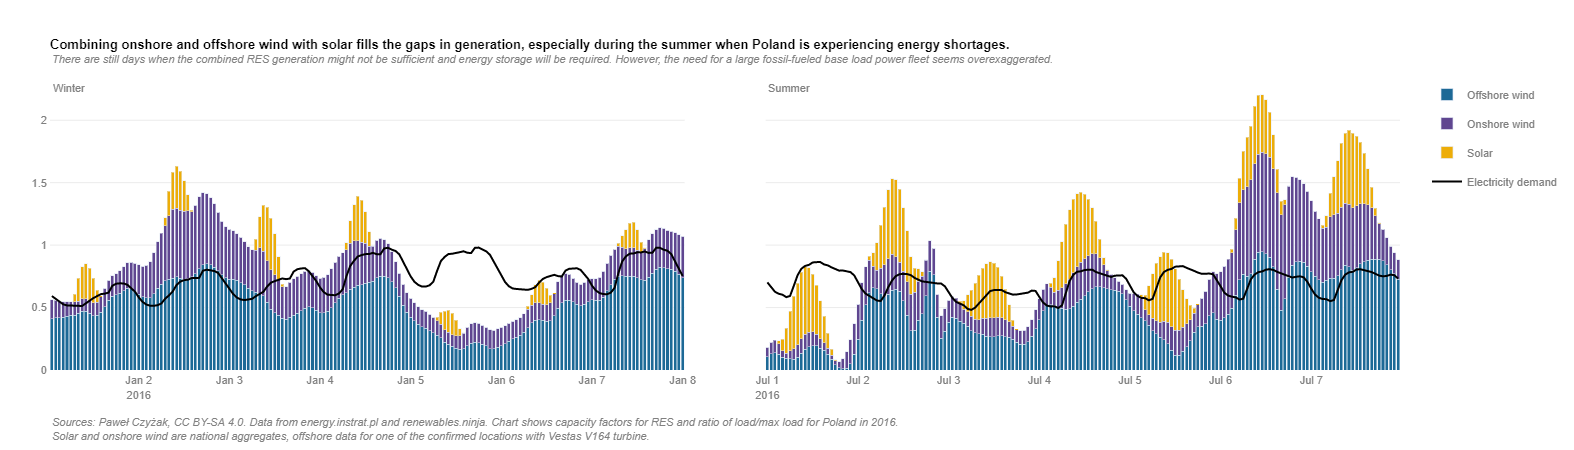

In [249]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, shared_yaxes=True, horizontal_spacing = 0.06, vertical_spacing = 0.01)

fig.add_trace(go.Bar(name='Offshore wind', x=load_df_winter.index, y=load_df_winter['offshore'], marker_color = 'rgb(29, 105, 150)', legendgroup='group1'), row=1, col=1)
fig.add_trace(go.Bar(name='Onshore wind', x=load_df_winter.index, y=load_df_winter['wind'], marker_color = 'rgb(95, 70, 144)', legendgroup='group2'), row=1, col=1)
fig.add_trace(go.Bar(name='Solar', x=load_df_winter.index, y=load_df_winter['solar'], marker_color = 'rgb(237, 173, 8)', legendgroup='group3'), row=1, col=1)
fig.add_trace(go.Scatter(x=load_df_winter.index, y=load_df_winter['load'],
                        mode='lines',
                        name='Electricity demand',
                        line=dict(color='black', width=2),
                        legendgroup='group4'
        ), row=1, col=1)

fig.add_trace(go.Bar(name='Offshore wind', x=load_df_summer.index, y=load_df_summer['offshore'], marker_color = 'rgb(29, 105, 150)', legendgroup='group1', showlegend = False), row=1, col=2)
fig.add_trace(go.Bar(name='Onshore wind', x=load_df_summer.index, y=load_df_summer['wind'], marker_color = 'rgb(95, 70, 144)', legendgroup='group2', showlegend = False), row=1, col=2)
fig.add_trace(go.Bar(name='Solar', x=load_df_summer.index, y=load_df_summer['solar'], marker_color = 'rgb(237, 173, 8)', legendgroup='group3', showlegend = False), row=1, col=2)
fig.add_trace(go.Scatter(x=load_df_summer.index, y=load_df_summer['load'],
                        mode='lines',
                        name='Electricity demand',
                        line=dict(color='black', width=2),
                        legendgroup='group4',
                        showlegend = False
        ), row=1, col=2)

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='rgb(235, 235, 235)')

fig.update_layout(barmode='stack',
        colorway=px.colors.qualitative.Prism,
        width=1110,
        plot_bgcolor='white',  
        title=dict(
            text='<b>Combining onshore and offshore wind with solar fills the gaps in generation, especially during the summer when Poland is experiencing energy shortages.</b>',
            font=dict(
                family="Work Sans, sans-serif",
                size=13,
                color="black",
            ),
            x=0,
            xref='paper',
            yref='paper',
            xanchor="left", 
            yanchor="top",
        ),
        margin=dict(t=80, b=80,l=50, r=50),
        font=dict(
            family="Work Sans, sans-serif",
            size=11,
            color="grey"
        ),
        annotations=[
            go.layout.Annotation( 
                text='<i>There are still days when the combined RES generation might not be sufficient and energy storage will be required. However, the need for a large fossil-fueled base load power fleet seems overexaggerated.</i>',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=0,
                y=1.1,
                xanchor="left", 
                yanchor="top",
                visible=True,
                font=dict(
                    family="Work Sans, sans-serif",
                    size=11,
                    color="grey"
                )
            ),
            go.layout.Annotation( 
                text='Winter',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=0,
                y=1,
                xanchor="left", 
                yanchor="top",
                visible=True,
                font=dict(
                    family="Work Sans, sans-serif",
                    size=11,
                    color="grey"
                )
            ),
            go.layout.Annotation( 
                text='Summer',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=0.53,
                y=1,
                xanchor="left", 
                yanchor="top",
                visible=True,
                font=dict(
                    family="Work Sans, sans-serif",
                    size=11,
                    color="grey"
                )
            ),
            go.layout.Annotation( 
                text='<i>Sources: Paweł Czyżak, CC BY-SA 4.0. Data from energy.instrat.pl and renewables.ninja. Chart shows capacity factors for RES and ratio of load/max load for Poland in 2016.<br>Solar and onshore wind are national aggregates, offshore data for one of the confirmed locations with Vestas V164 turbine.</i>',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=0,
                y=-0.15,
                xanchor="left", 
                yanchor="top",
                visible=True,
                font=dict(
                    family="Work Sans, sans-serif",
                    size=11,
                    color="grey"
                )
            ),
        ]
)

fig.show(    
    config={
        'modeBarButtonsToRemove': ['lasso2d', "zoomIn2d", 'resetScale2d'],
        "locale": "en",
        "toImageButtonOptions": {"width": None, "height": None}
    },
)

In [250]:
fig.write_html("season_graph.html", include_plotlyjs="cdn")